# Chapter 4

In [63]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from tqdm import tqdm

In [3]:
#WownlLoad dataset.

!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2024-09-20 16:32:38--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M   540KB/s    in 2.7s    

2024-09-20 16:32:42 (540 KB/s) - ‘data.csv.1’ saved [1475504/1475504]



## Loading, EDA, Cleaning.

In [4]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df_copy = df.copy()

In [6]:
columns = ['Make', 'Model', 'Year', 'Engine HP',
           'Engine Cylinders', 'Transmission Type',
           'Vehicle Style', 'highway MPG', 'city mpg',
           'MSRP']
df = df[columns]
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [7]:
# clean all column label.

df.columns = df.columns.str.replace(' ', '_').str.lower()

In [8]:
columns = [c.replace(' ', '_').lower() for c in columns]
columns

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'msrp']

In [9]:
[df.update(pd.DataFrame({c: (df[c].str.replace(' ', '_').str.lower())})) for c in columns if df.dtypes[c] == 'object']

# This updates each column c, with new values, which are cleaned column that are lowered and space removed.
#df.update(pd.DataFrame({'A': new_values}))

df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [10]:
# fill na

df.fillna(0, inplace=True)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [11]:
# create above_average column -- to change dataset into a class task.

df['above_average'] = (df.msrp > df.msrp.mean()).astype(int)
del df['msrp']
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
full_train_df, test_df = train_test_split(df, test_size=0.2, random_state=1)
train_df, val_df = train_test_split(full_train_df, test_size=0.25, random_state=1)

assert (len(train_df) + len(val_df) + len(test_df)) == len(df)

In [14]:
train_df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
5727,toyota,highlander_hybrid,2016,280.0,6.0,automatic,4dr_suv,28,27,1
5814,chevrolet,impala_limited,2014,300.0,6.0,automatic,sedan,30,18,0
8450,buick,regal,2016,259.0,4.0,automatic,sedan,27,19,0
2396,volkswagen,cc,2015,280.0,6.0,automated_manual,sedan,25,17,1
5494,dodge,grand_caravan,2016,283.0,6.0,automatic,passenger_minivan,25,17,0


In [15]:
y_train = train_df['above_average']
y_test = test_df['above_average']
y_val = val_df['above_average']

del train_df['above_average']
del test_df['above_average']
del val_df['above_average']

## Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score and compute AUC with the above_average variable
- Use the training dataset for that
- If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

- AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

- Which numerical variable (among the following 4) has the highest AUC?

engine_hp
engine_cylinders
highway_mpg
city_mpg

In [16]:
numeric_cols = [c for c in train_df.columns if train_df.dtypes[c] != 'object']
# numeric_cols.remove('year')
# numeric_cols.remove('above_average')
numeric_cols

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [17]:
from sklearn.metrics import roc_auc_score

In [18]:
roc_scores = []

for col in numeric_cols:
    roc_ = roc_auc_score(y_train, train_df[col])
    print(roc_)
    roc_scores.append(roc_)
    if roc_ < 0.5:
        train_df[col] = -train_df[col]
        print(col, 'is negative')

0.687551492804683
0.9171031265539011
0.766116490165669
0.3669412128227987
highway_mpg is negative
0.3265755356754767
city_mpg is negative


In [19]:
dict(zip(numeric_cols, roc_scores))

{'year': 0.687551492804683,
 'engine_hp': 0.9171031265539011,
 'engine_cylinders': 0.766116490165669,
 'highway_mpg': 0.3669412128227987,
 'city_mpg': 0.3265755356754767}

In [20]:
train_df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
5727,toyota,highlander_hybrid,2016,280.0,6.0,automatic,4dr_suv,-28,-27
5814,chevrolet,impala_limited,2014,300.0,6.0,automatic,sedan,-30,-18
8450,buick,regal,2016,259.0,4.0,automatic,sedan,-27,-19
2396,volkswagen,cc,2015,280.0,6.0,automated_manual,sedan,-25,-17
5494,dodge,grand_caravan,2016,283.0,6.0,automatic,passenger_minivan,-25,-17


## Question 2: Training the model

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

- LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

- What's the AUC of this model on the validation dataset? (round to 3 digits)?
* 0.678
* 0.779
* 0.878
* 0.979

In [21]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [22]:
dv = DictVectorizer(sparse=False)

dv.fit(train_df.to_dict(orient='records'))
X_train = dv.transform(train_df.to_dict(orient='records'))
X_train

array([[-2.700e+01,  6.000e+00,  2.800e+02, ...,  0.000e+00,  0.000e+00,
         2.016e+03],
       [-1.800e+01,  6.000e+00,  3.000e+02, ...,  1.000e+00,  0.000e+00,
         2.014e+03],
       [-1.900e+01,  4.000e+00,  2.590e+02, ...,  1.000e+00,  0.000e+00,
         2.016e+03],
       ...,
       [-3.200e+01,  4.000e+00,  1.300e+02, ...,  0.000e+00,  0.000e+00,
         2.017e+03],
       [-1.600e+01,  5.000e+00,  1.620e+02, ...,  1.000e+00,  0.000e+00,
         1.991e+03],
       [-1.400e+01,  6.000e+00,  2.400e+02, ...,  0.000e+00,  0.000e+00,
         2.003e+03]])

In [23]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [24]:
def prepare_df_to_x(df):
    df = df.copy()
    X = dv.transform(df.to_dict(orient='records'))
    return X

In [25]:
X_val = prepare_df_to_x(val_df)
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([1.02658369e-02, 1.59267257e-04, 4.43552188e-03, ...,
       1.69696553e-05, 9.99449045e-01, 2.00064607e-03])

In [26]:
round(roc_auc_score(y_val, y_pred), 3)

0.957

## Question 3: Precision and Recall

Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01

For each threshold, compute precision and recall

Plot them

At which threshold precision and recall curves intersect?

0.28
0.48
0.68
0.88

In [79]:
precisions = []
recalls = []

for t in tqdm(np.arange(0, 1.01, 0.01)):
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    assert (tp.sum() + fp.sum() + tn.sum() + fn.sum()) == len(y_val)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    precisions.append(precision)
    recalls.append(recall)

  0%|                                                   | 0/101 [00:00<?, ?it/s]/tmp/ipykernel_12841/2305983530.py:11: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)
100%|███████████████████████████████████████| 101/101 [00:00<00:00, 1443.82it/s]


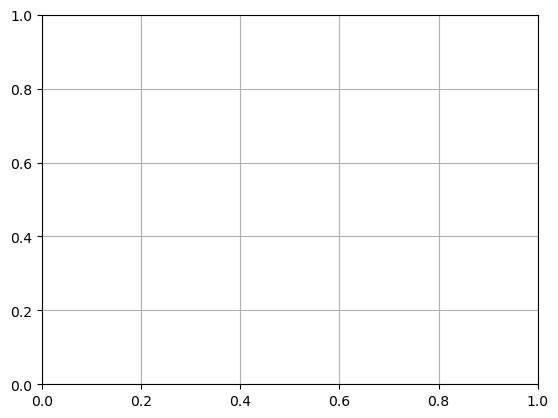

In [91]:
plt.grid()

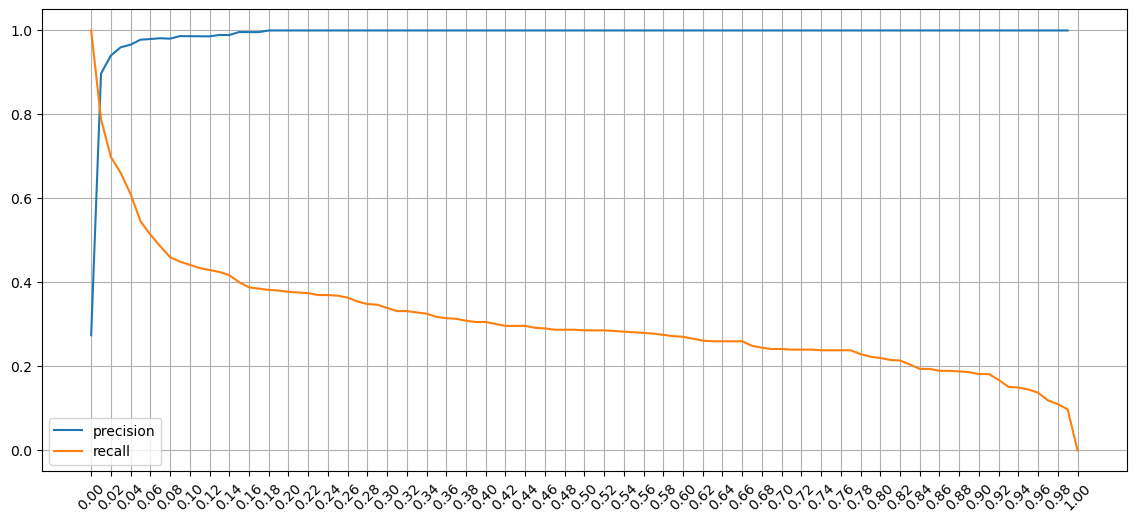

In [112]:
plt.figure(figsize=(14, 6))

plt.plot(np.arange(0, 1.01, 0.01), precisions, label='precision')
plt.plot(np.arange(0, 1.01, 0.01), recalls, label='recall')

plt.grid(True)
plt.xticks(np.arange(0, 1.01, 0.02), rotation=45)
plt.legend()

plt.show()

Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F
1
=
2
⋅
P
⋅
R
P
+
R

Where 
P
 is precision and 
R
 is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?



In [115]:
t = 0.5
f1_scores = []

for t in tqdm(np.arange(0, 1.01, 0.01)):
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    assert (tp.sum() + fp.sum() + tn.sum() + fn.sum()) == len(y_val)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * ((precision * recall) / (precision + recall))
    f1_scores.append(f1_score)

  0%|                                                   | 0/101 [00:00<?, ?it/s]/tmp/ipykernel_12841/3262112858.py:10: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)
100%|███████████████████████████████████████| 101/101 [00:00<00:00, 1318.09it/s]


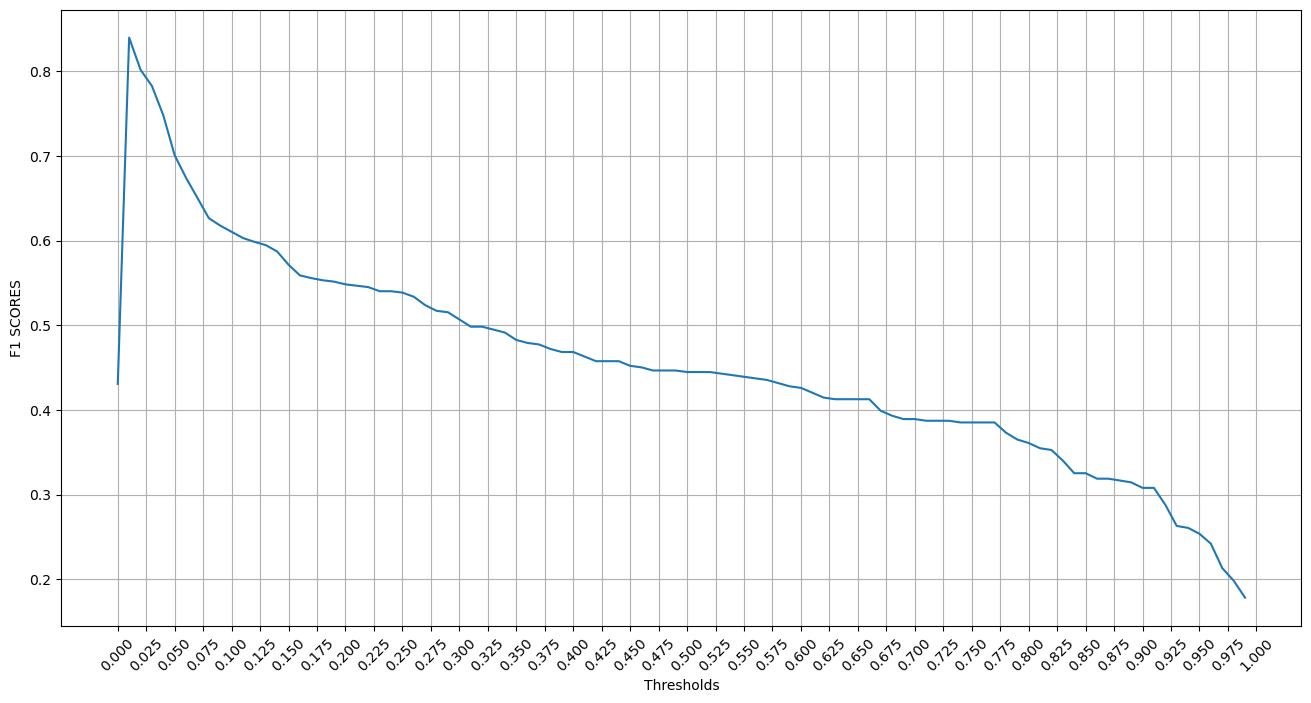

In [128]:
plt.figure(figsize=(16, 8))

plt.plot(np.arange(0, 1.01, 0.01), f1_scores);

plt.ylabel('F1 SCORES')
plt.xlabel('Thresholds');

plt.xticks(np.arange(0, 1.01, 0.025), rotation=45)
plt.grid(True)

## Question 5: 5-Fold CV


Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
Iterate over different folds of df_full_train
Split the data into train and validation
Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
Use AUC to evaluate the model on validation
How large is standard deviation of the scores across different folds?

0.003
0.030
0.090
0.140


In [129]:
from sklearn.model_selection import KFold

In [136]:
full_train_df.reset_index(drop=True, inplace=True)
full_train_df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,mercedes-benz,clk-class,2007,382.0,8.0,automatic,coupe,22,15,1
1,nissan,370z,2016,332.0,6.0,manual,coupe,26,18,0
2,gmc,sierra_1500,2017,285.0,6.0,automatic,extended_cab_pickup,24,18,0
3,porsche,911,2016,350.0,6.0,manual,convertible,26,19,1
4,volkswagen,gti,2013,200.0,4.0,manual,4dr_hatchback,31,21,0
...,...,...,...,...,...,...,...,...,...,...
9526,audi,q5,2016,272.0,6.0,automatic,4dr_suv,26,18,1
9527,toyota,tundra,2015,381.0,8.0,automatic,crew_cab_pickup,17,13,1
9528,saab,900,1997,150.0,4.0,manual,4dr_hatchback,26,18,0
9529,pontiac,g6,2009,164.0,4.0,automatic,coupe,33,22,0


In [142]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)
scores = []

for train_id, val_id in kf.split(full_train_df):
    train_df = full_train_df.iloc[train_id]
    val_df = full_train_df.iloc[val_id]

    train_y = train_df.above_average
    val_y = val_df.above_average

    del train_df['above_average']
    del val_df['above_average']

    dv = DictVectorizer(sparse=False)

    dv.fit(train_df.to_dict(orient='records'))
    X_train = dv.transform(train_df.to_dict(orient='records'))
    X_val = dv.transform(val_df.to_dict(orient='records'))

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, train_y)

    pred = model.predict_proba(X_val)[:, 1]
    scores.append(roc_auc_score(val_y, pred))

In [145]:
round(np.std(scores), 3)

0.003

## Question 6: Hyperparameter Tuning
Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.01, 0.1, 0.5, 10]
Initialize KFold with the same parameters as previously
Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
Which C leads to the best mean score?

0.01
0.1
0.5
10

In [153]:
C_values = [0.01, 0.1, 0.5, 10]

kf = KFold(n_splits=5, shuffle=True, random_state=1)

records = []

for C in tqdm(C_values):
    scores = []
    for train_id, val_id in kf.split(full_train_df):
        train_df = full_train_df.iloc[train_id]
        val_df = full_train_df.iloc[val_id]
    
        train_y = train_df.above_average
        val_y = val_df.above_average
    
        del train_df['above_average']
        del val_df['above_average']
    
        dv = DictVectorizer(sparse=False)
    
        dv.fit(train_df.to_dict(orient='records'))
        X_train = dv.transform(train_df.to_dict(orient='records'))
        X_val = dv.transform(val_df.to_dict(orient='records'))
    
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, train_y)
    
        pred = model.predict_proba(X_val)[:, 1]
        scores.append(roc_auc_score(val_y, pred))
    mean = np.mean(scores)
    std = np.std(scores)
    print(C, round(mean, 3), round(std, 3))
    records.append({'c_val': C, 'mean': round(mean, 3), 'std': round(std, 3)})

 25%|███████████▎                                 | 1/4 [00:02<00:06,  2.01s/it]

0.01 0.952 0.002


 50%|██████████████████████▌                      | 2/4 [00:03<00:03,  1.95s/it]

0.1 0.972 0.001


 75%|█████████████████████████████████▊           | 3/4 [00:05<00:01,  1.95s/it]

0.5 0.979 0.002


100%|█████████████████████████████████████████████| 4/4 [00:07<00:00,  1.96s/it]

10 0.984 0.003


In [154]:
pd.DataFrame(records)

,c_val,mean,std
0,0.01,0.952,0.002
1,0.10,0.972,0.001
2,0.50,0.979,0.002
3,10.00,0.984,0.003
